# Linear algebra toturial session (Dec 11 2023): Exam Practice Problems

- Prioritize reviewing the lecture slides from all units, with a special focus on the material covered after the midterm. Additionally, revisit and thoroughly understand the assignments and lab exercises associated with each topic, as they are essential for practical understanding.
- The goal of this session is to guide you through the approaches for solving problems and effective studying techniques for the exam. It's important to grasp the underlying concepts and problem-solving strategies rather than relying on rote memorization of specific solutions.

In [33]:
# packages
import numpy as np
from scipy.ndimage import median_filter
import time

## Question 1: Unit 2
Suppose I want to smooth a 1000x1000 pixel image with a filter with a full width of 21 pixels (half width of 10+1 central pixel). How many operations is this? Should it take long to do?

### Answer
To answer your question, let's break it down into two parts: calculating the number of operations and assessing the time it should take to perform these operations.

### Calculating the Number of Operations

1. **Filter Size**: The filter has a full width of 21 pixels, which means it covers a $21\times21$ pixel area (since filters are typically square).

2. **Number of Pixels in the Image**: The image is $1000\times1000$ pixels, so there are $1,000,000$ pixels in total.

3. **Operations per Pixel**: For each pixel in the image, the filter will perform an operation on each of the $21\times21 = 441$ pixels in its area.

4. **Total Operations**: To find the total number of operations, we multiply the number of pixels in the image by the number of operations per pixel:
   $$ \text{Total Operations} = \text{Number of Pixels in Image} \times \text{Operations per Pixel} $$
   $$ \text{Total Operations} = 1,000,000 \times 441 $$

### Assessing the Time It Should Take

- Modern computers can perform a large number of operations very quickly. The actual time taken will depend on the specific algorithm used for smoothing, the efficiency of the implementation, and the hardware capabilities of the computer executing the operation.

- For a basic smoothing operation like a mean or median filter, it should not take very long even with this number of operations, especially if optimized libraries or hardware acceleration (like GPU processing) are used.

Now, let's find time for a median filter on a random matrix in Python.

#### Python example code: Median filter from *Scipy* package
Median filter is a non-linear digital filtering technique often used in image processing to reduce noise while preserving edges. Read more about this filter [here](https://en.wikipedia.org/wiki/Median_filter).

In [34]:
from scipy.ndimage import median_filter
# Generate a synthetic 1000x1000 pixel image
image = np.random.rand(1000, 1000)

# Define the size of the filter
filter_size = 21

# Start the timer
start_time = time.time()

# Apply median filter
smoothed_image = median_filter(image, size=filter_size)

# Stop the timer
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time
print(f"Time to do the 21-pixel 'median' filter is {time_taken} seconds.")


Time to do the 21-pixel 'median' filter is 4.438791990280151 seconds.


## Question 2: Units 3-5
1. Suppose I integrate a function over an interval with 100 samples, and then 1000. Discuss how the accuracy of the result will change for 

    1. Trapezoid rule

    2. Simpson's rule

### Answer

The two techniques have $O(h^2)$ and $O(h^4)$ errors, so the errors will decrease by $10^2$ and $10^4$ respectively.

1. For $N_1=100$, $h_1 \sim 1/N_1 = 10^{-2}$, so:
   1. Trapezoid rule: $$\text{Error} \sim O(h_1^2) = 10^{-4}$$
   2. Simpson's rule: $$\text{Error} \sim O(h_1^4) = 10^{-8}$$
2. For $N_2=1000$, $h_2 \sim 1/N_2 = 10^{-3}$, so:
   1. Trapezoid rule: $$\text{Error} \sim O(h_2^2) = 10^{-6}$$
   2. Simpson's rule: $$\text{Error} \sim O(h_2^4) = 10^{-12}$$
3. Relative improvement
   1. Trapezoid rule: $$\text{Improvement} \sim O(h_2^2)/O(h_1^2) \simeq 10^{-2},$$ Two-fold or 100 times improvement.
   2. Simpson's rule: $$\text{Improvement} \sim O(h_2^4)/O(h_1^4) \simeq 10^{-4},$$ Four-fold or 10000 times improvement.

## Question 3: Units 6-7
Suppose you were given data describing a surface (e.g. a topographic map) of the form $z = f(x,y)$, as a numpy 2D array. How would you calculate the *partial* derivatives $\partial z/\partial x$ and $\partial z/\partial y$.  

### Answer
You could use, e.g. forward difference; given an array A you would calculate $A[i+1][j]$ - $A[i][j]$ and $A[i][j+1]$ - $A[i][j]$:


To calculate the partial derivatives $ \frac{\partial z}{\partial x} $ and $ \frac{\partial z}{\partial y} $ of a surface described by $ z = f(x, y) $ represented as a NumPy 2D array, you can use numerical differentiation techniques. Here, I used the forward difference method:

- For $ \frac{\partial z}{\partial x} $ at a point $(i, j)$:
  $$ \frac{\partial z}{\partial x} \bigg|_{(i, j)} \approx \frac{A[i+1][j] - A[i][j]}{\Delta x} $$

- For $ \frac{\partial z}{\partial y} $ at the same point:
  $$ \frac{\partial z}{\partial y} \bigg|_{(i, j)} \approx \frac{A[i][j+1] - A[i][j]}{\Delta y} $$

Here, $ \Delta x $ and $ \Delta y $ represent the spacing between points in the x and y directions, respectively.


#### Python Implementation

In [2]:
# Assuming A is your 2D numpy array representing the surface
# and dx, dy are the spacings in the x and y directions

def forward_difference(A, dx, dy):
    # Partial derivative with respect to x
    dz_dx = (A[1:, :] - A[:-1, :]) / dx

    # Partial derivative with respect to y
    dz_dy = (A[:, 1:] - A[:, :-1]) / dy

    return dz_dx, dz_dy

#### Considerations

- The forward difference method is simple but may be less accurate compared to methods such as the central difference, especially if the function varies rapidly.
- The derivatives at the boundaries need special handling since $ A[i+1][j] $ and $ A[i][j+1] $ don't exist for the last row and column. One common approach is to use forward difference at the initial point and backward difference at the final point, or to assume some boundary conditions.
- This method assumes that the data points are evenly spaced in both the x and y directions.
- This method assumes the surface is reasonably smooth. If the data is noisy, you may need to smooth it before differentiation to get meaningful results.
- For highly irregular or sparse data, more sophisticated techniques like spline interpolation followed by differentiation might be required.

## Question 4: Units 4 and 8
Suppose you were asked to interpolate over 10 data points stored in a numpy array; discuss the different approaches you could take, and their relative advantages and disadvantages.   

### Answer
You could use a single 9-th order polynomial; you could construct this using basis functions (see the formula on slide 10, unit 4, or slide 10, unit 8). A better method, however, might be to use piece-wise interpolation; this is less subject to oscillations/ringing, new data values, etc.

#### Polynomial Interpolation (Unit 4)

For an $ n $-th order polynomial interpolation through $ n+1 $ data points $ (x_0, y_0), (x_1, y_1), \ldots, (x_n, y_n) $, a common approach is to use the Lagrange polynomial (unit 4, slide 10). The formula for the Lagrange interpolating polynomial is:

$$ P(x) = \sum_{i=0}^{n} y_i \cdot L_i(x) $$

where each $ L_i(x) $ is a Lagrange basis polynomial defined by:

$$ L_i(x) = \prod_{\substack{0 \leq j \leq n \\ j \neq i}} \frac{x - x_j}{x_i - x_j} $$

This formula ensures that $ P(x_i) = y_i $ for each data point $ (x_i, y_i) $.

- **Advantages**: 
   - It guarantees that the interpolating function passes exactly through all the data points.
   - Provides a smooth and continuous curve.

- **Disadvantages**: 
   - Prone to Runge's phenomenon, especially at the edges of the interval. This results in oscillations that can make the polynomial a poor representation of the function between points.
   - Not flexible to new data additions without recalculating the entire polynomial.
   - Computationally intensive for high-degree polynomials.


#### Cubic Spline Interpolation (Unit 8)

Cubic spline interpolation involves dividing the data into segments and fitting a cubic polynomial to each segment. For data points $ (x_0, y_0), (x_1, y_1), \ldots, (x_n, y_n) $, a cubic spline is a set of cubic polynomials $ S_i(x) $ defined on each interval $[x_i, x_{i+1}]$ for $ i = 0, 1, \ldots, n-1 $. Each $ S_i(x) $ is of the form:

$$ S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3 $$

The coefficients $ a_i, b_i, c_i, $ and $ d_i $ are determined by the following conditions:
- $ S_i(x_i) = y_i $ and $ S_i(x_{i+1}) = y_{i+1} $ for each $ i $.
- The first and second derivatives of the spline polynomials are continuous across the intervals.
- Additional boundary conditions are applied at the ends (e.g., the spline could be 'clamped' with specified first derivatives at the ends, or 'natural' with second derivatives set to zero at the ends).

These conditions lead to a system of linear equations, which can be solved to find the coefficients of the cubic polynomials.

- **Advantages**:
   - Avoids the problems of high-degree polynomial interpolation.
   - Provides a good balance between flexibility and smoothness.
   - More stable and less prone to oscillations.

- **Disadvantages**:
   - Requires solving a system of equations, which can be more complex than a single polynomial.
   - While it is more stable than high-order polynomials, it can still struggle with highly erratic data.


## Question 5

Show the matrix produce of diagonal matrices is diagonal; what is its determinant, trace, relative to those of its factors?


### Answer

We use the definition of diagonal matrices with the Kronecker delta, $ \delta_{ij} $, where $ \delta_{ij} = 1 $ if $ i = j $ and $ \delta_{ij} = 0 $ otherwise. This effectively captures the essence of a diagonal matrix where non-diagonal elements are zero.

#### Matrix Multiplication
  - The element $ C_{ij} $ in the product matrix $ C = AB $ is given by $ C_{ij} = \sum_{k} A_{ik} B_{kj} $.
  - $A_{ij}=a_i\delta_{ij}$
  - For diagonal matrices $ A $ and $ B $, this becomes $ C_{ij} = \sum_{k} a_i \delta_{ik} b_j \delta_{kj} $.
  - Since $ \delta_{ik} $ and $ \delta_{kj} $ are zero unless $ i = k $ and $ k = j $ respectively, this simplifies to $ C_{ij} = a_i b_j \delta_{ij} $, which shows that $ C $ is also diagonal.


#### Trace

- **Trace of A and B**: The trace, being the sum of diagonal elements, is $ \text{Tr}(A) = \sum_i a_i $ and $ \text{Tr}(B) = \sum_i b_i $.
- **Trace of C**: For $ C $, the trace is $ \text{Tr}(C) = \sum_i a_i b_i $. This shows that the trace of the product of two diagonal matrices is not directly related to the traces of the individual matrices.
- Is $Tr(C)=Tr(A)+Tr(B)$? Or $Tr(C)=Tr(A) Tr(B)$? No relation

#### Determinant

- **Determinant of A and B**: The determinant of a diagonal matrix is the product of its diagonal elements, so $ \text{Det}(A) = \prod_i a_i $ and $ \text{Det}(B) = \prod_i b_i $.
- **Determinant of C**: For the product matrix $ C $, $ \text{Det}(C) = \prod_i a_i b_i $, which is indeed the product of the determinants of $ A $ and $ B $.
-  $Det(C)=Det(A)Det(B)$? Yes, this is correct.



## Question 6
What is the inverse of a diagonal matrix?


### Answer
A diagonal matrix $ D $ is invertible if and only if none of its diagonal elements are zero (See the determinant of Question 5). The inverse of a diagonal matrix, if it exists, is also a diagonal matrix where each diagonal element is the reciprocal of the corresponding diagonal element in the original matrix.

Suppose you have a diagonal matrix $ D $ given by:

$ D = \begin{bmatrix} d_1 & 0 & \cdots & 0 \\ 0 & d_2 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & d_n \end{bmatrix} $

where $ d_1, d_2, \ldots, d_n $ are the diagonal elements of $ D $.

The inverse of $ D $, denoted as $ D^{-1} $, is given by:

$ D^{-1} = \begin{bmatrix} \frac{1}{d_1} & 0 & \cdots & 0 \\ 0 & \frac{1}{d_2} & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & \frac{1}{d_n} \end{bmatrix} $

provided that none of $ d_1, d_2, \ldots, d_n $ are zero. If any of the diagonal elements are zero, the matrix is not invertible, and hence, it does not have an inverse.

The logic behind this is that in matrix multiplication, each element of the resulting matrix is a sum of products of corresponding elements. In the case of diagonal matrices, the off-diagonal elements are zero, so the product of a diagonal matrix and its inverse will yield the identity matrix, where each diagonal element multiplies with its reciprocal to produce 1, and all off-diagonal elements remain zero.

## Question 7
Given a 2x2 matrix, what are its eigenvalues? What is its characteristic equation? If the eigenvectors are distinct, how can we simplify multiplication of any vector by this matrix?

### Answer: Example 

Let's take a concrete example, e.g. 

$$D = \begin{bmatrix}-1\ 3\\ -4\ 6\end{bmatrix}\,,$$ 

Use eig() or eigh() to find the eigenvalues.

Write that the $Det(D - \lambda I) = 0$ to get the characteristic equation. Here, $I$ is the identiy matrix.

$$ det \Big(\begin{bmatrix}-1-\lambda\ 3\\ -4\ 6-\lambda\end{bmatrix}\Big)$$
$$ (-1-\lambda)(6-\lambda)+12=0$$

If the eigenvectors are distinct, then we can write any vector as a weigthed sum of the two; this makes multiplication by $D$ trivial. 

#### Python code

In [38]:
# Define the matrix D
D = np.array([[-1, 3], [-4, 6]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(D)

# Display the results
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)
print(eigenvectors.shape)

Eigenvalues: [2. 3.]
Eigenvectors: [[-0.70710678 -0.6       ]
 [-0.70710678 -0.8       ]]
(2, 2)


In [57]:
help(np.linalg.eig)

Help on function eig in module numpy.linalg:

eig(a)
    Compute the eigenvalues and right eigenvectors of a square array.
    
    Parameters
    ----------
    a : (..., M, M) array
        Matrices for which the eigenvalues and right eigenvectors will
        be computed
    
    Returns
    -------
    w : (..., M) array
        The eigenvalues, each repeated according to its multiplicity.
        The eigenvalues are not necessarily ordered. The resulting
        array will be of complex type, unless the imaginary part is
        zero in which case it will be cast to a real type. When `a`
        is real the resulting eigenvalues will be real (0 imaginary
        part) or occur in conjugate pairs
    
    v : (..., M, M) array
        The normalized (unit "length") eigenvectors, such that the
        column ``v[:,i]`` is the eigenvector corresponding to the
        eigenvalue ``w[i]``.
    
    Raises
    ------
    LinAlgError
        If the eigenvalue computation does not converg

### Answer: General solution

Eigenvectors of a general $2 \times 2$ matrix can be found by solving the characteristic equation of the matrix. Let's consider a general $2 \times 2$ matrix $ A $:

$$ A = \begin{bmatrix} a & b \\ c & d \end{bmatrix} $$

The eigenvalues, $ \lambda $, of matrix $ A $ are found by solving the characteristic equation, which is derived from the determinant of $ A - \lambda I $, where $ I $ is the $2 \times 2$ identity matrix:

$$ \text{det}(A - \lambda I) = \text{det}\left(\begin{bmatrix} a - \lambda & b \\ c & d - \lambda \end{bmatrix}\right) = 0 $$
$$ (a - \lambda)(d - \lambda) - bc = 0 $$
$$ \lambda^2 - Tr(A)\lambda +  Det(A) = 0 $$


where $Tr(A)=a+d$ and $Det(A)=(ad-bc)$ are the trace and determinant of $A$. Solve this quadratic equation to find the eigenvalues:

$$ \lambda = \dfrac{Tr(A)\pm\sqrt{Tr^2(A)-4Det(A)}}{2} $$

Now the eigenvalues are found, the eigenvectors can be determined by solving the system of linear equations formed by $ (A - \lambda I) \mathbf{v} = \mathbf{0} $ for each eigenvalue $ \lambda $, where $ \mathbf{v} $ is the eigenvector corresponding to $ \lambda $. This means solving:

For $ \lambda_i $:
$$ \begin{bmatrix} a - \lambda_i & b \\ c & d - \lambda_i \end{bmatrix} \begin{bmatrix} x_{i} \\ y_{i} \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} $$

which gives us

$$ y_i=\dfrac{\lambda_i-a}{b}x_i \quad\text{and}\quad y_i=\dfrac{c}{\lambda_i-d}x_i$$

for the first and second row of the matrix, respectively. Now, if we use the normalization condition, i.e. $x_i^2+y_i^2=1$, then we have

$$ x_i=\dfrac{\pm b}{\sqrt{(\lambda_i-a)^2+b^2}} \quad\text{and}\quad x_i=\dfrac{\pm(\lambda_i-d)}{\sqrt{(\lambda_i-d)^2+c^2}}$$ 

and

$$ y_i=\dfrac{\pm (\lambda_i-a)}{\sqrt{(\lambda_i-a)^2+b^2}} \quad\text{and}\quad y_i=\dfrac{\pm c}{\sqrt{(\lambda_i-d)^2+c^2}}$$ 

for the first and second rows, respectively. In other words,


$$\vec{v}_{i} = \pm \begin{bmatrix} \dfrac{b}{\sqrt{(\lambda_i-a)^2+b^2}} \\ \dfrac{\lambda_i-a}{\sqrt{(\lambda_i-a)^2+b^2}} \end{bmatrix} \quad \text{and} \quad \vec{v}_{i} = \pm \begin{bmatrix} \dfrac{\lambda_i-d}{\sqrt{(\lambda_i-d)^2+c^2}} \\ \dfrac{c}{\sqrt{(\lambda_i-d)^2+c^2}} \end{bmatrix} $$ 

See [here](https://people.math.harvard.edu/~knill/teaching/math21b2004/exhibits/2dmatrices/index.html) and [here](https://www.wolframalpha.com/input?i=eigen+vectors+of+2x2+matrix+) for similar calculations.

## Question 8
Consider a plane in ${\rm I\!R}^3$ passing through the origin  $O=(0,0,0)$ and points $P_1=(a,b,0), P_2= (0,c,d)$. What are two direction vectors? How far is the point $P = (e,f,g)$ from the plane? (You can assume a,b,c,d,e,f,g are all non-zero).

### Answer
Since the plane includes the origin, two obvious direction vectors are $\mathbf{v}_1 = (a,b,0)$, $\mathbf{v}_2 = (0, c,d)$. An obvious vector normal to the plane is $\mathbf{v}_1\times\mathbf{v}_2$ (work out components). Then if we normalize this vector and project the position vector $P$ onto it we will get the distance. Let do this step by step:

1. Direction Vectors: A plane passing through the origin and two other points can be defined by vectors that point from the origin to these points. The given points are $(a, b, 0)$ and $(0, c, d)$.  
   So, two direction vectors for the plane are:
   $$ \mathbf{v_1} = \begin{bmatrix} a \\ b \\ 0 \end{bmatrix} \quad \text{and} \quad \mathbf{v_2} = \begin{bmatrix} 0 \\ c \\ d \end{bmatrix} $$

2. Distance of Point $ P $ from the Plane: The distance of a point from a plane can be found using the formula:

   $$ \text{Distance} = \frac{| \mathbf{n} \cdot \mathbf{P} |}{\| \mathbf{n} \|} $$

   where $ \mathbf{n} $ is the normal vector to the plane, $ \mathbf{P} $ is the position vector of point $ P $, and $ \| \mathbf{n} \| $ is the magnitude of $ \mathbf{n} $.

3. Finding the Normal Vector $ \mathbf{n} $:The normal vector $ \mathbf{n} $ can be found by taking the cross product of the two direction vectors $ \mathbf{v_1} $ and $ \mathbf{v_2} $:

   $$ \mathbf{n} = \mathbf{v_1} \times \mathbf{v_2} $$
   $$ \mathbf{n} = (bd,-ad,ac) $$ 

4. Calculating the Distance: Once $ \mathbf{n} $ is obtained, the distance of $ P $ from the plane is calculated using the aforementioned formula. Let's compute the normal vector $ \mathbf{n} $ and the distance. The distance of the point $ P = (e, f, g) $ from the plane passing through the origin and points $ (a, b, 0) $ and $ (0, c, d) $ in ${\rm I\!R}^3$ is given by: $$ \text{Distance} = \frac{| a \cdot c \cdot g - a \cdot d \cdot f + b \cdot d \cdot e |}{\sqrt{a^2 \cdot c^2 + a^2 \cdot d^2 + b^2 \cdot d^2}} $$


## Question 9
What is the matrix describing a rotation in ${\rm I\!R}^3$ by an angle $\theta$ around the y-axis, that rotates x towards z?

### Answer
This is a clockwise rotation as see from the y direction, to it is opposite to the usual direction; the corresponidng matrix is:

$$ R_y(-\theta) = \begin{bmatrix} \cos(-\theta) & 0 & \sin(-\theta) \\ 0 & 1 & 0 \\ -\sin(-\theta) & 0 & \cos(-\theta) \end{bmatrix} \rightarrow$$
$$ R_y(-\theta) = \begin{bmatrix} \cos(\theta) & 0 & -\sin(\theta) \\ 0 & 1 & 0 \\ +\sin(\theta) & 0 & \cos(\theta) \end{bmatrix} $$

In this matrix:
- The first row represents the new positions of the unit x-axis after the rotation.
- The second row represents the unchanged y-axis (since the rotation is around the y-axis).
- The third row represents the new positions of the unit z-axis after the rotation.


If we want to rotate the system around x axis for $\beta$ in clockwise directio, then we have

$$ R_x(-\beta) = \begin{bmatrix} 0 & 1 & 0 \\ \cos(-\beta) & 0 & \sin(-\beta) \\ -\sin(-\beta) & 0 & \cos(-\beta) \end{bmatrix}$$

## Question 10
Given the equations

$$x + y - z = 3$$
$$2x + z = 0$$
$$x - y + 5z = 0$$

How would you solve them with paper and a pencil? How would you solve them in Python?

### Answer
Straightfoward Gaussian elemination and back substitution; in Python, you could define an array of coefficients $A$, a solution vector $B$, and use *solve(A,B)*.

#### Python code

In [40]:
# Coefficient matrix A and constant vector B
A = np.array([[1, 1, -1], [2, 0, 1], [1, -1, 5]])
B = np.array([3, 0, 0])

# Solving for X
X = np.linalg.solve(A, B)

print(X)


[-0.5  4.5  1. ]


## Question 11: Unit 17
Solve the non-linear equation 
$$\sin(x) = 1/(x^2+1) - x$$
using the binary search method.


### Answer
Plot function first to guess location of root; then see code from unit 17: Set end points bracketing solution, find sign of function at each, calculate midpoint, find sign there, reset interval to the half where the sign changes; iterate. 

#### Binary Search Method for Root Finding

1. **Initial Bracketing**: Choose two points, $ a $ and $ b $, such that the function changes sign between them. This means the function must be positive at one point and negative at the other, indicating that a root lies between them.

2. **Midpoint Calculation**: Calculate the midpoint $ c $ of the interval $[a, b]$.

3. **Function Evaluation**: Evaluate the function at $ c $.

4. **Interval Update**:
   - If the function changes sign between $ a $ and $ c $, set $ b = c $.
   - If the function changes sign between $ c $ and $ b $, set $ a = c $.

5. **Iteration**: Repeat steps 2-4 until the root is found to the desired accuracy.

#### Python code

Before implementing the binary search method, it's a good idea to plot the function to guess the location of the root. Let's start by plotting the function:

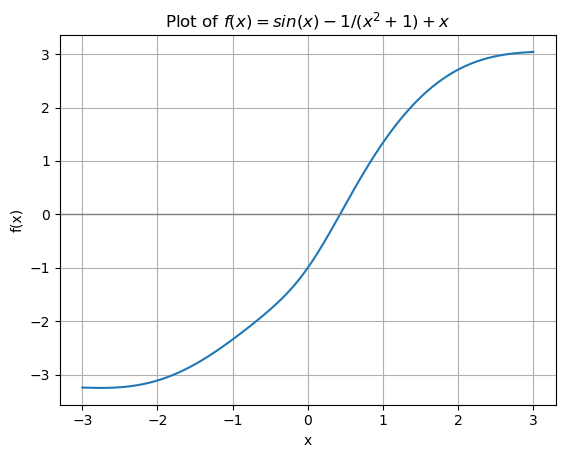

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return np.sin(x) - 1/(x**2 + 1) + x

# Generate x values
x = np.linspace(-3, 3, 400)

# Plot the function
plt.plot(x, f(x))
plt.axhline(0, color='gray', lw=1)
plt.xlabel(r'x')
plt.ylabel(r'f(x)')
plt.title(r'Plot of $f(x) = sin(x) - 1/(x^2 + 1) + x$')
plt.grid(True)
plt.show()

After plotting, we can implement the binary search method based on the initial bracketing observed from the plot. Let's proceed with the implementation. Now, let's implement the binary search method to find this root more precisely.


In [42]:

def binary_search_root(f, a, b, tol=1e-6):
    """Iteratively narrows down the interval $[a, b]$ until the midpoint of the interval is sufficiently close to a root of the function $ f(x) $.

    Parameters
    ----------
    f : function
        A continuous function for which the root is to be found. This function should take a single numeric argument and return a numeric value.
    a : float
        The lower bound of the search interval. The function `f` should be continuous on the interval `[a, b]`.
    b : float
        The upper bound of the search interval.
    tol : float, 1e-6
        The tolerance for the root's accuracy. The binary search stops when the interval's width is less than or equal to `tol`.

    Returns
    -------
    float
        returns a numeric value which is the approximate root of the function `f` within the interval `[a, b]`. 
        

    Raise
    -----
    If the binary search method fails (e.g., if `f(a)` and `f(b)` have the same sign), the function returns `None`.
        
    """
    if f(a) * f(b) >= 0:
        print("Binary search method fails.")
        return None

    while (b - a) / 2 > tol:
        midpoint = (a + b) / 2
        if f(midpoint) == 0:
            return midpoint  # The exact root
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint

    return (a + b) / 2

# Initial guesses based on the plot
a = -0.5
b = 0.5

# Find the root
root = binary_search_root(f, a, b)
root

0.42884349822998047

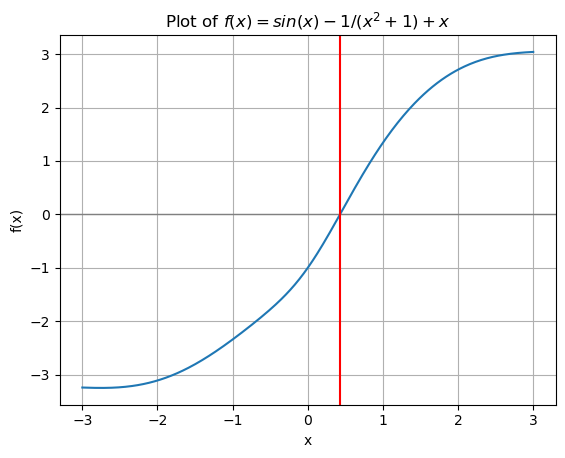

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return np.sin(x) - 1/(x**2 + 1) + x

# Generate x values
x = np.linspace(-3, 3, 400)

# Plot the function
plt.plot(x, f(x))
plt.axhline(0, color='gray', lw=1)
plt.xlabel(r'x')
plt.ylabel(r'f(x)')
plt.title(r'Plot of $f(x) = sin(x) - 1/(x^2 + 1) + x$')
plt.axvline(root, c='red')
plt.grid(True)
plt.show()

## Question 12

Find the maximum of the function 

$$f(x)  = \frac{1+3x-x^2}{1+ 3x^2}$$

on the interval $[-3,3]$.

### Answer
Code below shows function. Could calculate derivative analytically, but could also do this numerically and find root, e.g. by binary search.

#### Python code

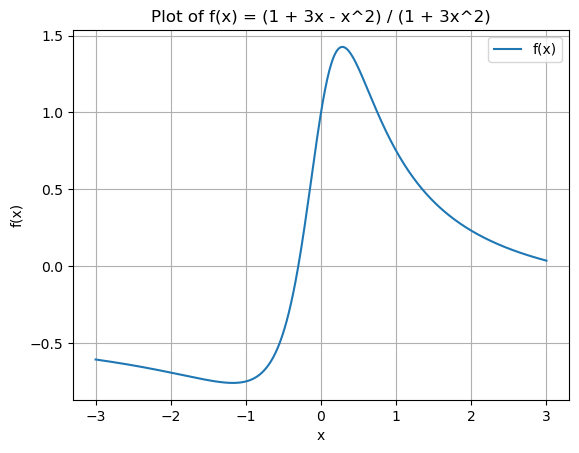

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the function
def f(x):
    return (1 + 3*x - x**2) / (1 + 3*x**2)

# Generate x values for plotting
x_values = np.linspace(-3, 3, 400)

# Calculate corresponding y values
y_values = f(x_values)

# Plotting
plt.plot(x_values, y_values, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = (1 + 3x - x^2) / (1 + 3x^2)')
plt.grid(True)
plt.legend()
plt.show()





In [54]:
# Finding the maximum numerically
def numerical_derivative(f, x, h=1e-5):
    """Calculates an approximation of the first derivative of a function at a given point, using the central difference method. 

    Parameters
    ----------
    f : function
        Function for which the derivative is to be estimated. This function should take a single numeric argument and return a numeric value.
    x : float
        The point at which the derivative of the function is to be estimated.
    h : floar, 1e-5
        The step size used for the central difference method. A smaller value of h generally leads to a more accurate estimate but might be prone to numerical errors. The default value is 1e-5.

    Returns
    -------
    float
        A numeric value, which is the estimated derivative of f at the point x.
    """
    return (f(x + h) - f(x - h)) / (2 * h)

def binary_search_max(f, a, b, tol=1e-6):
    """Iteratively narrows down the interval $[a, b]$ until the midpoint of the interval is sufficiently close to a maximmum of the function $ f(x) $.

    Parameters
    ----------
    f : function
        A continuous function for which the root is to be found. This function should take a single numeric argument and return a numeric value.
    a : float
        The lower bound of the search interval. The function `f` should be continuous on the interval `[a, b]`.
    b : float
        The upper bound of the search interval.
    tol : float, 1e-6
        The tolerance for the root's accuracy. The binary search stops when the interval's width is less than or equal to `tol`.

    Returns
    -------
    float
        returns a numeric value which is the approximate root of the function `f` within the interval `[a, b]`. 
    """
    while (b - a) > tol:
        midpoint = (a + b) / 2
        f_left = numerical_derivative(f, midpoint - tol)
        f_right = numerical_derivative(f, midpoint + tol)

        if f_left > 0 and f_right < 0:  # Maximum found
            return midpoint
        elif f_left > 0:  # Increasing, move right
            a = midpoint
        else:  # Decreasing, move left
            b = midpoint

    return (a + b) / 2


# Finding the maximum using modified binary search
max_x = binary_search_max(f, -3, 3)
max_value = f(max_x)

print(f"$x_max={max_x}, f(x_max)={max_value}$")


$x_max=0.28415966033935547, f(x_max)=1.4262397540502023$


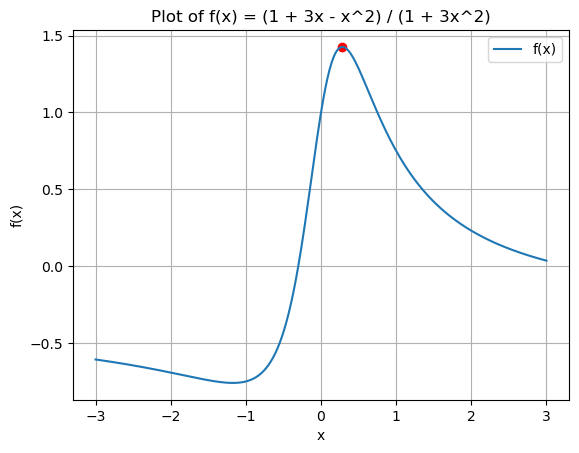

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the function
def f(x):
    return (1 + 3*x - x**2) / (1 + 3*x**2)

# Generate x values for plotting
x_values = np.linspace(-3, 3, 400)

# Calculate corresponding y values
y_values = f(x_values)

# Plotting
plt.plot(x_values, y_values, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = (1 + 3x - x^2) / (1 + 3x^2)')
plt.grid(True)
plt.scatter(max_x,max_value,c='red')
plt.legend()
plt.show()


## Question 13: Unit 20
Solve for the motion of a (non-linear) pendulum using Euler's method.

### Answer
See Unit 20, p.6: equations of motion can be split into

$$d\theta/dt = \omega$$
$$d\omega/dt = -g/L$$

Taking the 2-component state vector $(\theta,\omega)$, we can advance each component by the step $f'dt$, where $f' = (\omega,-g/L)$.

Note Euler is not a great way of doing this -> doesn't conserve energy well.


## Question14: Unit 21

Given a time series, how would you smooth it with a 5 pixel width filter?

### Answer
See code examples for unit 21.

## Question 15
Given an image, how would you split small white `foreground' objects from a dark background?

### Answer
Use pixel histogram to determine threshold; then set values around median to zero to remove bakcground; set other values to 1 to identify obejct pixels.